# Segment Customers of a E-Com Company by using RFM Approach

R- Recency ( Recent customers who purchased the product)    
F- Frequency (how frequently customer is coming to buy products)   
M- Monetary value (how much money we are earning from a customer)  

**Prime Customers**   
R- less   
F- high   
M- high   

In [1]:
#import basic package
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import datetime

In [2]:
#import dataset
dataset=pd.read_csv('E-com_Data.csv')
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [3]:
dataset.shape

(541116, 12)

### Significant columns   
1) **CustomerID** - to segment customers  
2) **Date of Purchase** - to calculate recency  
3) **Invoice No** - to find freqency   
4) **Price**- to calculate Monetary value

In [4]:
dataset.info()     #missing values in most of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


### 1. Drop duplicate data

In [5]:
dataset.duplicated().sum()

3145

In [6]:
dataset=dataset.drop_duplicates(ignore_index=True)

In [7]:
dataset.duplicated().sum()

0

### 2. Drop insignificant columns

In [8]:
dataset.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [9]:
dataset=dataset.drop(['Item Code','Quantity',
       'Time', 'price per Unit','Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],axis=1)
dataset.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537971 entries, 0 to 537970
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        404181 non-null  float64
 1   InvoieNo          537970 non-null  float64
 2   Date of purchase  537970 non-null  object 
 3   Price             537970 non-null  float64
dtypes: float64(3), object(1)
memory usage: 16.4+ MB


### 3. Correcting data type 

In [11]:
#renaming first
dataset=dataset.rename(columns={'Date of purchase':'Date','InvoieNo': 'InvoiceNo'})

In [12]:
dataset['Date']=pd.to_datetime(dataset['Date'])

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537971 entries, 0 to 537970
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CustomerID  404181 non-null  float64       
 1   InvoiceNo   537970 non-null  float64       
 2   Date        537970 non-null  datetime64[ns]
 3   Price       537970 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 16.4 MB


### 4. Missing values

In [14]:
dataset.isnull().sum()

CustomerID    133790
InvoiceNo          1
Date               1
Price              1
dtype: int64

In [15]:
dataset.isnull().sum()/len(dataset)*100

CustomerID    24.869370
InvoiceNo      0.000186
Date           0.000186
Price          0.000186
dtype: float64

In [16]:
# Nearly 25% data missing in Customer ID , talk to your stakeholder , drop this data for now

In [17]:
dataset=dataset.dropna(subset=['CustomerID'])
dataset.isnull().sum()

CustomerID    0
InvoiceNo     0
Date          0
Price         0
dtype: int64

### 5. How many customers we have in this given data

In [18]:
dataset['CustomerID'].value_counts()

4043.0    7970
1896.0    5874
1301.0    5099
331.0     4615
1675.0    2779
          ... 
2198.0       1
3209.0       1
2251.0       1
3127.0       1
3244.0       1
Name: CustomerID, Length: 4349, dtype: int64

In [19]:
dataset['CustomerID'].nunique()   #4349 customers data

4349

## RFM Approach

In [20]:
dataset['Date'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

last transaction date we can get from here (2017-12-19)     
So, lets create a date object (2017-12-20) to calculate recency    
2017-12-20 - 1 day old customer     
2017-12-21 - 2 day old customer....    

In [21]:
new_date= datetime.datetime(2017,12,20)
new_date

datetime.datetime(2017, 12, 20, 0, 0)

## Calculating Recency , Frequency, Monetary

In [22]:
dataset.head(2)

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-05-10,1740.0


In [23]:
RFMScore=dataset.groupby('CustomerID').agg({'Date':lambda x:(new_date-x.max()).days,
                                          'InvoiceNo': lambda x:x.count(),
                                          'Price': lambda x: x.sum()})

In [24]:
RFMScore=RFMScore.rename(columns={'Date':'Recency','InvoiceNo':'Frequency','Price':'Monetary'})
RFMScore

,Recency,Frequency,Monetary
CustomerID,,,
2.0,4,182,553704.0
3.0,77,27,257404.0
4.0,20,72,176613.0
5.0,18,16,41976.0
6.0,9,84,151822.0
...,...,...,...
4368.0,17,10,20480.0
4369.0,181,7,10774.0
4370.0,12,13,24962.0


### Good Customer  
Recency - less  
Frequency - high   
Monetary- high  

In [25]:
RFMScore.Recency.describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

**So, in recency ,**    
Recency < Q1 or 25% - good customers   
Recency > Q3 or 75% - bad customers   

In [26]:
RFMScore.Frequency.describe()

count    4349.000000
mean       92.936537
std       232.086935
min         1.000000
25%        17.000000
50%        42.000000
75%       101.000000
max      7970.000000
Name: Frequency, dtype: float64

**So, in Frequency ,**    
Freq.  < Q1 or 25% - bad customers   
Freq.  > Q3 or 75% - good customers 

In [27]:
RFMScore.Monetary.describe()

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monetary, dtype: float64

**So, in Monetary ,**    
Monetary  < Q1 or 25% - bad customers   
Monetary  > Q3 or 75% - good customers 

**So, when we do clustering, our clusters could be like**      
1. R- min , F- max, M- max  (good customers)   
2. R-min, F- max, M-max   
3. R-max, F-min, M-max   
4. R-max, F-min, M-min  (bad customers)

### Split into four clusters/segments on basis of quantile method

In [28]:
quantiles=RFMScore.quantile(q=[0.25,0.50,0.75])
quantiles=quantiles.to_dict()
quantiles

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [29]:
#x-value, p - recency,frequency,monetary, d- quantile dict
def RScore(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4

In [30]:
#function to calculate fre, monetary score
def FMScore(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [31]:
RFMScore.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [32]:
RFMScore['R']=RFMScore['Recency'].apply(RScore,args=('Recency',quantiles))
RFMScore['F']=RFMScore['Frequency'].apply(FMScore,args=('Frequency',quantiles))
RFMScore['M']=RFMScore['Monetary'].apply(FMScore,args=('Monetary',quantiles))
RFMScore                                    

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
2.0,4,182,553704.0,1,1,1
3.0,77,27,257404.0,4,3,1
4.0,20,72,176613.0,3,2,2
5.0,18,16,41976.0,2,4,3
6.0,9,84,151822.0,1,2,2
...,...,...,...,...,...,...
4368.0,17,10,20480.0,2,4,4
4369.0,181,7,10774.0,4,4,4
4370.0,12,13,24962.0,2,4,4


**RFM Score**    
= (1,1,1) - good customer      
= (4,4,4) - bad customer    

In [33]:
#combining R,F,M values to 1 column

RFMScore['RFMGroup']=RFMScore.R.map(str)+RFMScore.F.map(str)+RFMScore.M.map(str)
RFMScore['RFMScore']=RFMScore[['R','F','M']].sum(axis=1)
RFMScore=RFMScore.reset_index()
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
0,2.0,4,182,553704.0,1,1,1,111,3
1,3.0,77,27,257404.0,4,3,1,431,8
2,4.0,20,72,176613.0,3,2,2,322,7
3,5.0,18,16,41976.0,2,4,3,243,9
4,6.0,9,84,151822.0,1,2,2,122,5


RFMScore- sum=3 (Prime customers)

Now, we have **10 clusters** , from RFMScore equal 3 to 12   

## Categorize Customers basis RFM Score in 4 clusters

In [34]:
loyality_level=['Prime','Gold','Silver','Bronze']
score_cuts=pd.qcut(RFMScore.RFMScore,q=4,labels=loyality_level)
RFMScore['Loyality Level']=score_cuts.values
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Loyality Level
0,2.0,4,182,553704.0,1,1,1,111,3,Prime
1,3.0,77,27,257404.0,4,3,1,431,8,Gold
2,4.0,20,72,176613.0,3,2,2,322,7,Gold
3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,6.0,9,84,151822.0,1,2,2,122,5,Prime


In [35]:
#report to share
RFMScore.to_csv('Customer Segmentation.csv')

### Number of customers in each cluster

In [56]:
final_details=RFMScore.groupby('Loyality Level')[['Recency','Frequency','Monetary','CustomerID']].agg({
    'Recency':'mean','Frequency':'mean','Monetary':'mean','CustomerID':'nunique'
})
final_details=final_details.reset_index()

In [57]:
final_details

,Loyality Level,Recency,Frequency,Monetary,CustomerID
0,Prime,10.200000,227.785496,585979.422137,1310
1,Gold,32.593629,57.475524,124481.796426,1287
2,Silver,84.019169,25.174654,56236.376038,939
3,Bronze,163.617466,10.051661,23804.766298,813


In [58]:
final_details=final_details.rename(columns={'CustomerID':'No. of Buyers'})
final_details

,Loyality Level,Recency,Frequency,Monetary,No. of Buyers
0,Prime,10.200000,227.785496,585979.422137,1310
1,Gold,32.593629,57.475524,124481.796426,1287
2,Silver,84.019169,25.174654,56236.376038,939
3,Bronze,163.617466,10.051661,23804.766298,813


In [59]:
#percentage of buyers

final_details['Percent']=final_details['No. of Buyers']/final_details['No. of Buyers'].sum()*100
final_details['Percent']=round(final_details['Percent'],2)
final_details

,Loyality Level,Recency,Frequency,Monetary,No. of Buyers,Percent
0,Prime,10.200000,227.785496,585979.422137,1310,30.12
1,Gold,32.593629,57.475524,124481.796426,1287,29.59
2,Silver,84.019169,25.174654,56236.376038,939,21.59
3,Bronze,163.617466,10.051661,23804.766298,813,18.69


In [60]:
final_details1=final_details[['Loyality Level','No. of Buyers','Percent']]
final_details1

,Loyality Level,No. of Buyers,Percent
0,Prime,1310,30.12
1,Gold,1287,29.59
2,Silver,939,21.59
3,Bronze,813,18.69


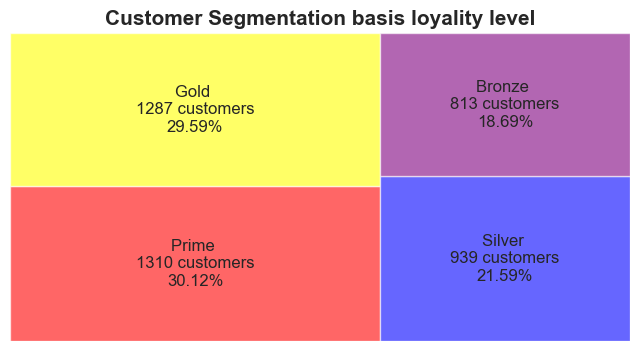

In [61]:
#Tree Map
import squarify
fig=plt.gcf()
ax=fig.add_subplot()
fig.set_size_inches(8,4)
color_dict={'Prime':'red','Gold':'yellow','Silver':'blue','Bronze':'Purple'}

squarify.plot(sizes=final_details['No. of Buyers'],color=color_dict.values(),
              label=['{} \n{:.0f} customers\n{}%'.format(*final_details1.iloc[i]) for i in range(0,len(final_details1))],
             alpha=0.6)
plt.title('Customer Segmentation basis loyality level',fontsize=15,fontweight='bold')
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='Recency', ylabel='Loyality Level'>

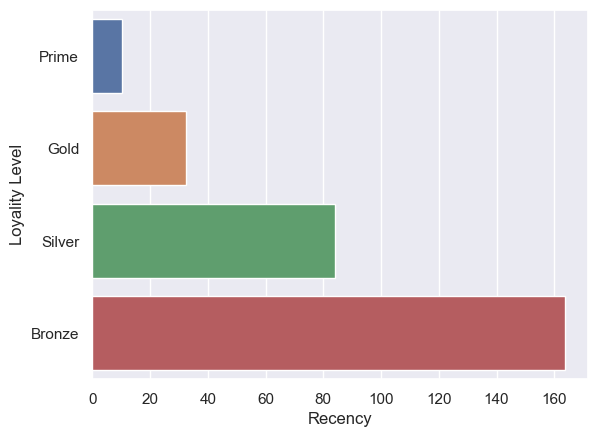

In [62]:
sns.barplot(x='Recency',y='Loyality Level',data=final_details)

<AxesSubplot:xlabel='Frequency', ylabel='Loyality Level'>

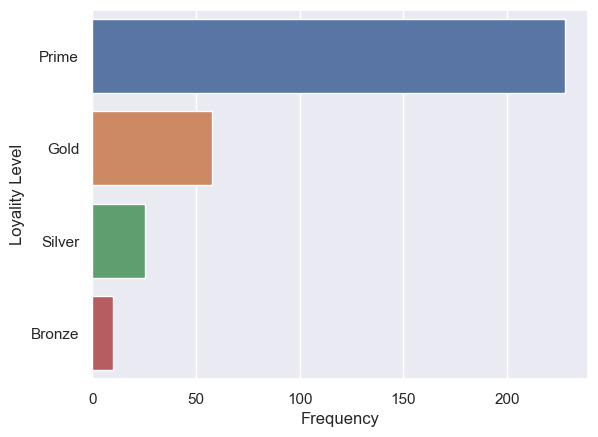

In [64]:
sns.barplot(x='Frequency',y='Loyality Level',data=final_details)
#average visit of prime customers more than all others 

<AxesSubplot:xlabel='Monetary', ylabel='Loyality Level'>

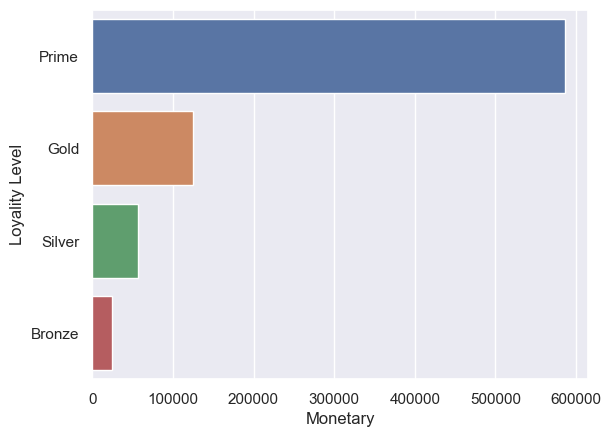

In [65]:
sns.barplot(x='Monetary',y='Loyality Level',data=final_details)
#75% of our revenue from 30% of total customers (Prime Customers)
#similar to Pareto rule, (80/20 rule) - 80% of revenue from 20% of customers

## K-Means Clustering Method

In [42]:
RFMScore.head(2)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Loyality Level
0,2.0,4,182,553704.0,1,1,1,111,3,Prime
1,3.0,77,27,257404.0,4,3,1,431,8,Gold


In [43]:
#create a new dataset
RFMScore1=RFMScore.iloc[:,1:4]
RFMScore1.head(2)

,Recency,Frequency,Monetary
0,4,182,553704.0
1,77,27,257404.0


In [46]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(RFMScore1)
scaled_data

array([[0.00487013, 0.02271301, 0.01697483],
       [0.12337662, 0.00326264, 0.00864866],
       [0.03084416, 0.00890952, 0.00637839],
       ...,
       [0.01785714, 0.00150584, 0.00211692],
       [0.00487013, 0.09449115, 0.0093007 ],
       [0.08116883, 0.00865855, 0.00880085]])

In [47]:
scaled_data=pd.DataFrame(scaled_data,index=RFMScore1.index,columns=RFMScore1.columns)
scaled_data.head(2)

,Recency,Frequency,Monetary
0,0.004870,0.022713,0.016975
1,0.123377,0.003263,0.008649


In [48]:
#Building K-means Cluster
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,15):
    km=KMeans(n_clusters=i,random_state=101)
    km.fit(scaled_data)
    wcss.append(km.inertia_)
    
wcss

[26.485217504119646,
 15.687959620731913,
 11.303285271307187,
 8.46637132255194,
 6.332840126192597,
 5.398201839257956,
 4.526043086435308,
 3.799728902981923,
 3.3115341695512788,
 2.811586088258872,
 2.3539787791775506,
 2.142332696144651,
 1.9442274929747922]

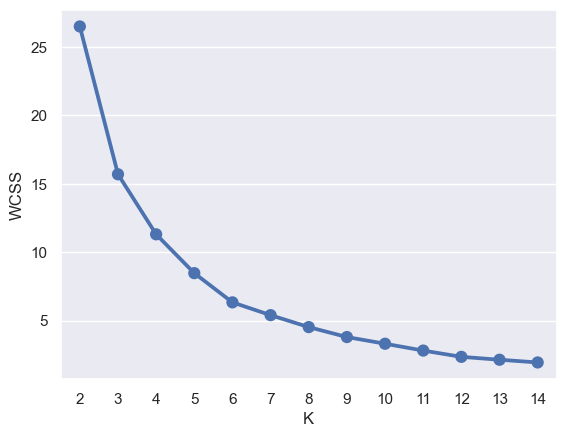

In [49]:
#elbow method to find K-value
abc=[2,3,4,5,6,7,8,9,10,11,12,13,14]
sns.pointplot(abc,wcss)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

In [50]:
#K=6
#building model
km=KMeans(n_clusters=6,random_state=101)
y_kmeans=km.fit_predict(scaled_data)
y_kmeans

array([0, 3, 0, ..., 0, 0, 3])

In [51]:
RFMScore1['Clusters']=km.labels_
RFMScore1.head(10)

,Recency,Frequency,Monetary,Clusters
0,4,182,553704.0,0
1,77,27,257404.0,3
2,20,72,176613.0,0
3,18,16,41976.0,0
4,9,84,151822.0,0
5,208,4,9410.0,1
6,234,58,135550.0,1
7,15,13,65832.0,0
8,16,58,331601.0,0
9,9,131,771439.0,0


In [52]:
RFMScore1['Clusters'].value_counts()

0    2672
3     844
5     374
1     274
2     173
4      12
Name: Clusters, dtype: int64

In [55]:
final_details_km=RFMScore1.groupby('Clusters').agg({
    'Recency':'mean','Frequency':'mean','Monetary':'mean'
})
final_details_km['No. of Buyers']=RFMScore1['Clusters'].value_counts()
final_details_km

,Recency,Frequency,Monetary,No. of Buyers
Clusters,,,,
0,12.675524,117.780314,2.778854e+05,2672
1,242.802920,20.751825,4.747083e+04,274
2,365.878613,18.554913,2.960067e+04,173
3,60.520142,38.598341,9.600645e+04,844
4,4.000000,3131.833333,1.108638e+07,12
5,140.117647,27.852941,6.763825e+04,374


So, we have segmented our clients in 6 clusters,   
**Cluster 4 - Prime customers**  (with most profitable and regular clients )    
**Cluster 2** - does not contribute much to company's market, low expenditure and least visiting customers